# Aircraft Saftey Analysis


**Author:** Noah Meakins
***

# Overview

This in-depth analysis is intended to guide our company's foray into the commercial and private aviation sectors. By identifying historical safety risks and the most common causes of serious accidents, we aim to implement best practices and safety standards that surpass industry norms. This proactive approach to safety and risk analysis will be foundational in establishing our company as a responsible and trustworthy player in the aviation industry.

### Business Problem

My company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises but do not know anything about the potential risks of aircraft. I have been tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor. With the data I will gather from the attached dataset, I will provide insights that will assist the head of the new aviation division, which can then use those insights to help decide which aircraft to purchase. Some specific data I will be analyzing at a deeper level are Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. Some questions I will be asking myself during this analysis are:

1. Out of the columns that might have missing data, what methods should I implement for columns that I will need in my analysis? 
2. What Charts will be beneficial in presenting a visual representation of my analysis? 
3. How will I determine the safest and most profitable aircraft to invest in? 

These questions are important from a business perspective because if the data in my analysis is skewed due to missing data or data that doesn’t pertain to this analysis, it can negatively influence business decisions.  
***

### Data Understanding

- The data for this project was sourced from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It's relevant to our analysis as we aim to understand various aircraft models and the levels of saftey associated with them. 

- The dataset consists of individual aircraft accidents, each record detailing the accident. It includes data from incidents in the United States and international waters. Key variables include Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. 

- For this analysis, in line with our company's focus on safety and risk assessment, the primary target variable is 'total fatal injuries'. Analyzing this variable will help us assess the severity of accidents and understand the safety challenges inherent in the aviation industry, especially pertinent to commercial and private flight operations.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200) # I wanted to see all the columns in the dataset when printing the dataframe
pd.set_option('max_row', 200)
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/unit66/Downloads/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
df.shape

(88889, 31)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Aviation Data 
The Aviation dataset consists of records from 1962 to 2023, and contains a large amount of information on Event Date, Location, Aircraft Damage, Injury Severity, and Total Fatal Injuries.

In [8]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

In preparation for this analysis, I will simplify our tasks by normalizing the column names and dropping anything we wont need. This will make things a bit easier to analyze. 


In [9]:
# Subsetting the data to only include the columns I want to work with and making a copy of the dataframe
df = df[[#'Event.Id', 
       'Investigation.Type', 
       # 'Accident.Number', 
       'Event.Date',
       'Location', 'Country', 
       # 'Latitude', 'Longitude', 'Airport.Code',
       # 'Airport.Name', 
       'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 
       # 'Registration.Number', 
       'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
       # 'FAR.Description',
       # 'Schedule', 
       'Purpose.of.flight', 
       # 'Air.carrier', 
       'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 
       # 'Report.Status',
       #'Publication.Date'
       ]].copy()

In [10]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [11]:
df.dtypes

Investigation.Type                object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
dtype: object

['latitude', 'longitude', 'far_description', 'schedule', 'air_carrier', 'airport_code', 'airport_name', 'event_id', 'accident_number', 'registration_number', 'report_status', 'publication_date']

In [12]:
# Creating a function that takes the column names and returns a normalized version of it
def normalize_column_name(name):
    return name.strip().lower().replace(' ', '_').replace('.','_').replace('-','_')

In [13]:
# List comprehension to apply the function to all the column names
df.columns = [normalize_column_name(col) for col in df.columns]

In [14]:
# Verifying that the column names have been normalized
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [15]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

In [16]:
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
1371,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0,VMC,Cruise
3082,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise
4761,Accident,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,Schempp-hirth,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,1.0,VMC,Cruise
7941,Accident,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,Cessna,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Taxi
8661,Accident,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,Snow,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,2.0,VMC,Landing
13532,Accident,1985-11-30,"SAN PEDRO, CA",United States,Fatal(1),Destroyed,NaN,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,1.0,4.0,7.0,0.0,VMC,Approach
19820,Incident,1988-03-10,"GREENSBORO, NC",United States,Incident,NaN,NaN,Boeing,737,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,159.0,VMC,Maneuvering
21077,Incident,1988-08-05,"ATLANTA, GA",United States,Incident,Minor,NaN,Douglas,DC-9-51,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,199.0,UNK,Taxi
22453,Incident,1989-03-01,"HOUSTON, TX",United States,Incident,NaN,NaN,Mcdonnell Douglas,DC-9-82,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,185.0,IMC,Approach
24878,Accident,1990-02-09,"TETERBORO, NJ",United States,Non-Fatal,Substantial,NaN,Mitsubishi,MU-2B-35,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Taxi


In [17]:
# Dropping duplicated rows from the dataframe
df = df.drop_duplicates()

# Resetting the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [18]:
# Verifying that the duplicated rows have been dropped
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight


In [19]:
# List of columns to check for missing data
columns_to_check = ['location', 'country', 'make', 'model', 'amateur_built', 'number_of_engines']

df = df.dropna(subset=columns_to_check)

df.reset_index(drop=True, inplace=True)

In [20]:
# Replacing 'Unavailable' with NaN first, to unify the missing data representation
df['injury_severity'] = df['injury_severity'].replace('Unavailable', pd.NA)

# Now replacing all NaN values with 'Unknown'
df['injury_severity'] = df['injury_severity'].fillna('Unknown')

In [21]:
# Replacing all NaN values with 'Unknown' for aircraft_damage
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

In [22]:
# Looking into the rows that have a value of 0.0 in the 'number_of_engines' column
df[df['number_of_engines'] == 0.0].head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
60,Accident,1982-01-09,"CALISTOGA, CA",United States,Non-Fatal,Substantial,Glider,Schleicher,ASW 20,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Landing
245,Accident,1982-02-06,"GLENDALE, AZ",United States,Non-Fatal,Substantial,Balloon,Raven,S-55A,No,0.0,Unknown,Personal,0.0,0.0,0.0,2.0,VMC,Landing
350,Accident,1982-02-19,"PHOENIX, AZ",United States,Non-Fatal,Substantial,Balloon,Balloon Works,FIREFLY,No,0.0,Unknown,Personal,0.0,0.0,0.0,3.0,VMC,Landing
429,Accident,1982-02-27,"CINCINNATI, OH",United States,Non-Fatal,Substantial,Balloon,Barnes,FIREFLY-7,No,0.0,Unknown,Personal,0.0,1.0,1.0,2.0,VMC,Takeoff
432,Accident,1982-02-28,"NAPA, CA",United States,Non-Fatal,Destroyed,Balloon,Barnes,BALLOON AX7,No,0.0,Unknown,Unknown,0.0,0.0,1.0,4.0,VMC,Landing


In [23]:
# Filtering out 'number_of_engines' that have a value of 0.0
df = df[df['number_of_engines'] != 0.0]

df.reset_index(drop=True, inplace=True)

In [24]:
df = df[df['engine_type'] != 'None']

df.reset_index(drop=True, inplace=True)

In [25]:
df['engine_type'].value_counts()

Reciprocating      68836
Turbo Shaft         3438
Turbo Prop          3311
Turbo Fan           2358
Turbo Jet            693
Unknown               89
Geared Turbofan       11
Electric               8
LR                     2
UNK                    1
Hybrid Rocket          1
Name: engine_type, dtype: int64

In [26]:
# Changing NaN in 'engine_type' to 'Unknown' only where 'number_of_engines' is 'Unknown'
df.loc[(df['number_of_engines'] == 'Unknown') & (df['engine_type'].isna()), 'engine_type'] = 'Unknown'

In [27]:
df['aircraft_category'].value_counts()

Airplane             24803
Helicopter            2899
Gyrocraft              168
Weight-Shift           153
Powered Parachute       87
Glider                  84
Ultralight              26
WSFT                     9
Balloon                  9
Powered-Lift             4
Blimp                    4
Unknown                  4
Rocket                   1
ULTR                     1
Name: aircraft_category, dtype: int64

In [28]:
# Checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type         0.000000
event_date                 0.000000
location                   0.000000
country                    0.000000
injury_severity            0.000000
aircraft_damage            0.000000
aircraft_category         65.221887
make                       0.000000
model                      0.000000
amateur_built              0.000000
number_of_engines          0.000000
engine_type                3.061488
purpose_of_flight          3.967502
total_fatal_injuries      12.708808
total_serious_injuries    13.729304
total_minor_injuries      12.893457
total_uninjured            6.047886
weather_condition          1.911738
broad_phase_of_flight     26.449191
dtype: float64


In [29]:
# Filtering to include only rows where all specified columns are not NaN
filtered_df = df[df[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].notna().all(axis=1)].copy()

# Displaying the resulting DataFrame
df = filtered_df

filtered_df


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
5,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown
6,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81230,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,PIPER,PA42,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
81231,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,CIRRUS DESIGN CORP,SR22,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
81232,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,SWEARINGEN,SA226TC,No,2.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN
81233,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [30]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type         0.000000
event_date                 0.000000
location                   0.000000
country                    0.000000
injury_severity            0.000000
aircraft_damage            0.000000
aircraft_category         63.950004
make                       0.000000
model                      0.000000
amateur_built              0.000000
number_of_engines          0.000000
engine_type                3.594766
purpose_of_flight          3.219063
total_fatal_injuries       0.000000
total_serious_injuries     0.000000
total_minor_injuries       0.000000
total_uninjured            0.000000
weather_condition          2.165046
broad_phase_of_flight     31.249178
dtype: float64


In [31]:
df['aircraft_category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Gyrocraft', 'Glider', 'Ultralight',
       'Unknown', 'Weight-Shift', 'Powered Parachute', 'Powered-Lift',
       'Balloon', 'Rocket', 'Blimp', 'WSFT', 'ULTR'], dtype=object)

In [32]:
# Combining country and location columns into one column

df = df.copy()

df['combined_location'] = df['location'] + ', ' + df['country']

df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,combined_location
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,"MOOSE CREEK, ID, United States"
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,"BRIDGEPORT, CA, United States"
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,"EUREKA, CA, United States"
5,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,"COTTON, MN, United States"
6,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,"PULLMAN, WA, United States"


In [33]:
# reordering the columns alphabetically
df = df[df.columns.sort_values()]

df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make,model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
0,NaN,Destroyed,No,Cruise,"MOOSE CREEK, ID, United States",United States,Reciprocating,1948-10-24,Fatal(2),Accident,"MOOSE CREEK, ID",Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,NaN,Destroyed,No,Unknown,"BRIDGEPORT, CA, United States",United States,Reciprocating,1962-07-19,Fatal(4),Accident,"BRIDGEPORT, CA",Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
3,NaN,Destroyed,No,Cruise,"EUREKA, CA, United States",United States,Reciprocating,1977-06-19,Fatal(2),Accident,"EUREKA, CA",Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
5,NaN,Destroyed,No,Unknown,"COTTON, MN, United States",United States,Reciprocating,1981-08-01,Fatal(4),Accident,"COTTON, MN",Cessna,180,1.0,Personal,4.0,0.0,0.0,0.0,IMC
6,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",Cessna,140,1.0,Personal,0.0,0.0,0.0,2.0,VMC


In [34]:
# Re-checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         63.950004
aircraft_damage            0.000000
amateur_built              0.000000
broad_phase_of_flight     31.249178
combined_location          0.000000
country                    0.000000
engine_type                3.594766
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make                       0.000000
model                      0.000000
number_of_engines          0.000000
purpose_of_flight          3.219063
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          2.165046
dtype: float64


In [35]:

# Checking the percentage of 'Unknown' values in each column
percent_unknown = df.apply(lambda col: (col == 'Unknown').sum() / len(col) * 100)

print(percent_unknown)

aircraft_category         0.005848
aircraft_damage           2.388714
amateur_built             0.000000
broad_phase_of_flight     0.660770
combined_location         0.000000
country                   0.000000
engine_type               0.115489
event_date                0.000000
injury_severity           0.409327
investigation_type        0.000000
location                  0.000000
make                      0.017543
model                     0.000000
number_of_engines         0.000000
purpose_of_flight         8.378043
total_fatal_injuries      0.000000
total_minor_injuries      0.000000
total_serious_injuries    0.000000
total_uninjured           0.000000
weather_condition         0.000000
dtype: float64


In [36]:
# Combining 'make' and 'model' columns into one column
df['make_model'] = df['make'] + ' ' + df['model']

df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make,model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition,make_model
0,NaN,Destroyed,No,Cruise,"MOOSE CREEK, ID, United States",United States,Reciprocating,1948-10-24,Fatal(2),Accident,"MOOSE CREEK, ID",Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK,Stinson 108-3
1,NaN,Destroyed,No,Unknown,"BRIDGEPORT, CA, United States",United States,Reciprocating,1962-07-19,Fatal(4),Accident,"BRIDGEPORT, CA",Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK,Piper PA24-180
3,NaN,Destroyed,No,Cruise,"EUREKA, CA, United States",United States,Reciprocating,1977-06-19,Fatal(2),Accident,"EUREKA, CA",Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC,Rockwell 112
5,NaN,Destroyed,No,Unknown,"COTTON, MN, United States",United States,Reciprocating,1981-08-01,Fatal(4),Accident,"COTTON, MN",Cessna,180,1.0,Personal,4.0,0.0,0.0,0.0,IMC,Cessna 180
6,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",Cessna,140,1.0,Personal,0.0,0.0,0.0,2.0,VMC,Cessna 140


In [37]:
# Capitalizing all the values in the 'make_model' column
df['make_model'] = df['make_model'].str.upper()

In [38]:
# Dropping the no longer needed 'make' and 'model' columns
df.drop(columns = ['make', 'model'], inplace = True)


In [39]:
# Making sure my columns are still sorted correctly
df = df[df.columns.sort_values()]

df.head(5)

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
0,NaN,Destroyed,No,Cruise,"MOOSE CREEK, ID, United States",United States,Reciprocating,1948-10-24,Fatal(2),Accident,"MOOSE CREEK, ID",STINSON 108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,NaN,Destroyed,No,Unknown,"BRIDGEPORT, CA, United States",United States,Reciprocating,1962-07-19,Fatal(4),Accident,"BRIDGEPORT, CA",PIPER PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
3,NaN,Destroyed,No,Cruise,"EUREKA, CA, United States",United States,Reciprocating,1977-06-19,Fatal(2),Accident,"EUREKA, CA",ROCKWELL 112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
5,NaN,Destroyed,No,Unknown,"COTTON, MN, United States",United States,Reciprocating,1981-08-01,Fatal(4),Accident,"COTTON, MN",CESSNA 180,1.0,Personal,4.0,0.0,0.0,0.0,IMC
6,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",CESSNA 140,1.0,Personal,0.0,0.0,0.0,2.0,VMC


In [40]:
# Re-checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         63.950004
aircraft_damage            0.000000
amateur_built              0.000000
broad_phase_of_flight     31.249178
combined_location          0.000000
country                    0.000000
engine_type                3.594766
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make_model                 0.000000
number_of_engines          0.000000
purpose_of_flight          3.219063
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          2.165046
dtype: float64


In [41]:
# Filtering for 'Airplane' and 'Helicopter' in 'aircraft_category'
relevant_categories = ['Airplane', 'Helicopter']
filtered_df = df[df['aircraft_category'].isin(relevant_categories)].copy()

# Further filtering to include only rows where 'broad_phase_of_flight' is not NaN
non_nan_broad_phase = filtered_df[filtered_df['broad_phase_of_flight'].notna()]

non_nan_broad_phase


,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
6,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",CESSNA 140,1.0,Personal,0.0,0.0,0.0,2.0,VMC
7,Airplane,Substantial,No,Landing,"EAST HANOVER, NJ, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"EAST HANOVER, NJ",CESSNA 401B,2.0,Business,0.0,0.0,0.0,2.0,IMC
11,Airplane,Destroyed,No,Cruise,"HOMER, LA, United States",United States,Reciprocating,1982-01-02,Non-Fatal,Accident,"HOMER, LA",BELLANCA 17-30A,1.0,Personal,0.0,1.0,0.0,0.0,IMC
12,Airplane,Destroyed,No,Takeoff,"HEARNE, TX, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"HEARNE, TX",CESSNA R172K,1.0,Personal,1.0,0.0,0.0,0.0,IMC
13,Airplane,Destroyed,No,Cruise,"CHICKASHA, OK, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"CHICKASHA, OK",NAVION A,1.0,Personal,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60099,Airplane,Substantial,No,Takeoff,"PITTSTOWN, NJ, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"PITTSTOWN, NJ",CESSNA 182R,1.0,Personal,0.0,0.0,0.0,1.0,VMC
60100,Airplane,Substantial,No,Takeoff,"SARASOTA, FL, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"SARASOTA, FL",MOONEY M20E,1.0,Personal,0.0,2.0,0.0,0.0,VMC
60103,Airplane,Minor,No,Climb,"Aspen, CO, United States",United States,Reciprocating,2007-12-26,Incident,Incident,"Aspen, CO",PIPER PA-46-310P,1.0,Personal,0.0,0.0,0.0,4.0,VMC
60105,Airplane,Substantial,Yes,Cruise,"MURRIETA, CA, United States",United States,Reciprocating,2007-12-28,Non-Fatal,Accident,"MURRIETA, CA",HEIN SONEX,1.0,Personal,0.0,0.0,1.0,0.0,VMC


In [42]:
# Filtering the dataframe to only show relevant Aircraft types that align to the business problem
relevant_categories = ['Airplane', 'Helicopter']
filtered_df = df[df['aircraft_category'].isin(relevant_categories)].copy()

# Further filtering the newly filtered dataframe to only show non nan values in the broad phase of flight category
non_nan_broad_phase = filtered_df[filtered_df['broad_phase_of_flight'].notna()]

df = non_nan_broad_phase

df 

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
6,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",CESSNA 140,1.0,Personal,0.0,0.0,0.0,2.0,VMC
7,Airplane,Substantial,No,Landing,"EAST HANOVER, NJ, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"EAST HANOVER, NJ",CESSNA 401B,2.0,Business,0.0,0.0,0.0,2.0,IMC
11,Airplane,Destroyed,No,Cruise,"HOMER, LA, United States",United States,Reciprocating,1982-01-02,Non-Fatal,Accident,"HOMER, LA",BELLANCA 17-30A,1.0,Personal,0.0,1.0,0.0,0.0,IMC
12,Airplane,Destroyed,No,Takeoff,"HEARNE, TX, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"HEARNE, TX",CESSNA R172K,1.0,Personal,1.0,0.0,0.0,0.0,IMC
13,Airplane,Destroyed,No,Cruise,"CHICKASHA, OK, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"CHICKASHA, OK",NAVION A,1.0,Personal,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60099,Airplane,Substantial,No,Takeoff,"PITTSTOWN, NJ, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"PITTSTOWN, NJ",CESSNA 182R,1.0,Personal,0.0,0.0,0.0,1.0,VMC
60100,Airplane,Substantial,No,Takeoff,"SARASOTA, FL, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"SARASOTA, FL",MOONEY M20E,1.0,Personal,0.0,2.0,0.0,0.0,VMC
60103,Airplane,Minor,No,Climb,"Aspen, CO, United States",United States,Reciprocating,2007-12-26,Incident,Incident,"Aspen, CO",PIPER PA-46-310P,1.0,Personal,0.0,0.0,0.0,4.0,VMC
60105,Airplane,Substantial,Yes,Cruise,"MURRIETA, CA, United States",United States,Reciprocating,2007-12-28,Non-Fatal,Accident,"MURRIETA, CA",HEIN SONEX,1.0,Personal,0.0,0.0,1.0,0.0,VMC


In [43]:
# Removing rows where 'engine_type' is NaN
df = df.dropna(subset=['engine_type'])

In [44]:
# Removing rows where 'purpose_of_flight' is NaN
df = df.dropna(subset=['purpose_of_flight'])

In [45]:
# Removing rows where 'weather_condition' is NaN
df = df.dropna(subset=['weather_condition'])

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         0.0
aircraft_damage           0.0
amateur_built             0.0
broad_phase_of_flight     0.0
combined_location         0.0
country                   0.0
engine_type               0.0
event_date                0.0
injury_severity           0.0
investigation_type        0.0
location                  0.0
make_model                0.0
number_of_engines         0.0
purpose_of_flight         0.0
total_fatal_injuries      0.0
total_minor_injuries      0.0
total_serious_injuries    0.0
total_uninjured           0.0
weather_condition         0.0
dtype: float64


# Imputation on remaining columns

Now that I have cleaned the original dataset and dropped columns that wont benefit the analysis and business problem at hand, I will use methods of imputation to make sure the very small percentages of missing data in 'engine_type', 'purpose_of_flight', and 'weather_condition'. With the values these columns currently have, I think imputation with anything other than 'Unknown' could skew my analysis. So I am going to move forward with filling the very small percentage of remaining data with the 'Unknown' value. 

In [48]:
# Replacing NaN values in the 'engine_type' column to Unknown

df = df.copy()

df['engine_type'] = df['engine_type'].fillna('Unknown')

df['engine_type'].unique()

array(['Reciprocating', 'Turbo Shaft', 'Turbo Fan', 'Turbo Prop',
       'Turbo Jet', 'Unknown'], dtype=object)

In [49]:
df['purpose_of_flight'] = df['purpose_of_flight'].fillna('Unknown')

df['purpose_of_flight'].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Positioning', 'Skydiving',
       'Public Aircraft - Local', 'Public Aircraft - Federal',
       'Glider Tow', 'Flight Test', 'Public Aircraft - State',
       'Other Work Use'], dtype=object)

In [50]:
df['weather_condition'] = df['weather_condition'].fillna('Unknown')

df['weather_condition'].unique()

array(['VMC', 'IMC', 'UNK'], dtype=object)

In [51]:
# Final verification that all columns have zero missing data 
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         0.0
aircraft_damage           0.0
amateur_built             0.0
broad_phase_of_flight     0.0
combined_location         0.0
country                   0.0
engine_type               0.0
event_date                0.0
injury_severity           0.0
investigation_type        0.0
location                  0.0
make_model                0.0
number_of_engines         0.0
purpose_of_flight         0.0
total_fatal_injuries      0.0
total_minor_injuries      0.0
total_serious_injuries    0.0
total_uninjured           0.0
weather_condition         0.0
dtype: float64


The remaining rows with 'Unknown' values in the 'number_of_engines' column originally were NaN values. With this being said, 'Unknown' values in a numerical columns wont work. Above you will notice that the 'number_of_engines' column only has a remaining percenatange of 0.028233% 'Unknown' (originally 0.028233 of NaN) data. So I have decided it wont negatively effect my analysis with removing these rows entirely. 

In [53]:
# Filtering out rows where 'number_of_engines' is not a float (thus removing 'Unknown')
df_filtered = df[df['number_of_engines'].apply(lambda x: isinstance(x, float))]

df_filtered['number_of_engines'].unique()


array([1., 2., 3., 4.])

In [54]:

# Checking the percentage of 'Unknown' values in each column
percent_unknown = df.apply(lambda col: (col == 'Unknown').sum() / len(col) * 100)

print(percent_unknown)

aircraft_category          0.000000
aircraft_damage            1.333712
amateur_built              0.000000
broad_phase_of_flight      1.390465
combined_location          0.000000
country                    0.000000
engine_type                0.028377
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make_model                 0.000000
number_of_engines          0.000000
purpose_of_flight         17.139614
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          0.000000
dtype: float64


In [55]:
df['number_of_engines'].unique()

array([1., 2., 3., 4.])

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [56]:
# Grouping our dataset by 'aircraft_category' and calculating the mean of total_fatal_injuries
average_fatal_injuries = df.groupby('aircraft_category')['total_fatal_injuries'].mean()

average_fatal_injuries.head()


aircraft_category
Airplane      0.407915
Helicopter    0.361905
Name: total_fatal_injuries, dtype: float64

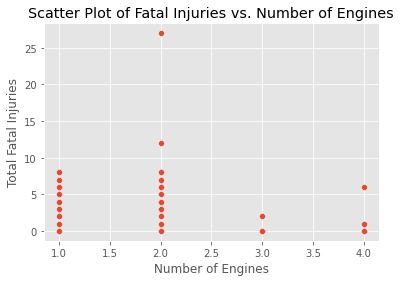

In [57]:
# Scatter plot of 'total_fatal_injuries' against 'number_of_engines'
sns.scatterplot(x='number_of_engines', y='total_fatal_injuries', data=df)

plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Scatter Plot of Fatal Injuries vs. Number of Engines')
plt.show()

In [58]:
from scipy.stats import pearsonr

# Calculating Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(df['total_minor_injuries'].dropna(), df['total_serious_injuries'].dropna())

print(f"Pearson's Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's Correlation Coefficient: 0.15706498205572625, P-value: 6.6695025452021e-21


In [76]:
print(avg_fatal_injuries.sort_values(by='total_fatal_injuries', ascending=True).head(20))

                make_model  total_fatal_injuries
0       AERO COMMANDER 100                   0.0
679          HARTMAN KR-II                   0.0
680              HATZ CB-1                   0.0
681             HEIN SONEX                   0.0
682            HELIO H-295                   0.0
683            HELIO H-395                   0.0
684             HILLER 12B                   0.0
685             HILLER 12E                   0.0
686     HILLER UH-12-SOLOY                   0.0
687          HILLER UH-12A                   0.0
688          HILLER UH-12C                   0.0
689          HILLER UH-12E                   0.0
678  HALLQUIST THUNDERBOLT                   0.0
690         HILLER UH-12L3                   0.0
692           HILLER UH12E                   0.0
693          HILLER UH12L4                   0.0
694       HILLER-SOLOY 12E                   0.0
695    HILLER-SOLOY UH-12E                   0.0
696         HOLLMAN CONDOR                   0.0
697   HOMEBUILT MUST

In [68]:
# Confirming that all entries for average fatal injuries are indeed zero
print(df.groupby('make_model')['total_fatal_injuries'].mean().sort_values().unique())


[0.00000000e+00 2.38095238e-02 3.33333333e-02 7.69230769e-02
 9.21052632e-02 1.11111111e-01 1.25000000e-01 1.26865672e-01
 1.33333333e-01 1.42857143e-01 1.66666667e-01 1.81818182e-01
 2.00000000e-01 2.22222222e-01 2.27272727e-01 2.29166667e-01
 2.35294118e-01 2.50000000e-01 2.63157895e-01 2.85714286e-01
 3.00000000e-01 3.17073171e-01 3.18181818e-01 3.20000000e-01
 3.33333333e-01 3.44827586e-01 3.57142857e-01 3.63636364e-01
 3.75000000e-01 3.91304348e-01 4.00000000e-01 4.16666667e-01
 4.28571429e-01 4.61538462e-01 5.00000000e-01 5.13513514e-01
 5.20000000e-01 5.37313433e-01 5.55555556e-01 5.71428571e-01
 6.00000000e-01 6.08695652e-01 6.25000000e-01 6.36363636e-01
 6.66666667e-01 6.92307692e-01 7.00000000e-01 7.08333333e-01
 7.14285714e-01 7.33333333e-01 7.50000000e-01 7.77777778e-01
 8.00000000e-01 8.75000000e-01 8.94736842e-01 9.00000000e-01
 1.00000000e+00 1.07692308e+00 1.14285714e+00 1.20000000e+00
 1.25000000e+00 1.26666667e+00 1.30000000e+00 1.33333333e+00
 1.50000000e+00 1.571428

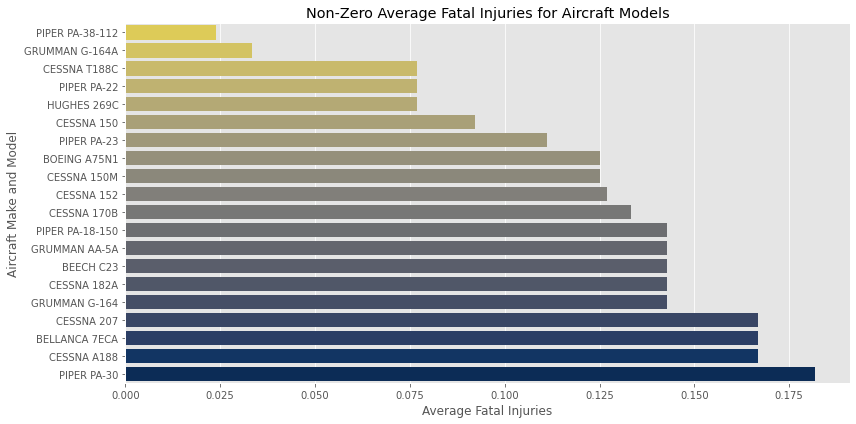

In [74]:
# Filter out the make and models with zero average fatal injuries
non_zero_avg_fatal = df.groupby('make_model')['total_fatal_injuries'].mean().reset_index()
non_zero_avg_fatal = non_zero_avg_fatal[non_zero_avg_fatal['total_fatal_injuries'] > 0]

non_zero_avg_fatal_sorted = non_zero_avg_fatal.sort_values('total_fatal_injuries', ascending=True)

palette = sns.color_palette("cividis_r", len(non_zero_avg_fatal_sorted.head(20)))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_fatal_injuries', 
    y='make_model', 
    data=non_zero_avg_fatal_sorted.head(20),
    palette=palette
)
plt.title('Non-Zero Average Fatal Injuries for Aircraft Models')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Make and Model')
plt.tight_layout()
plt.show()


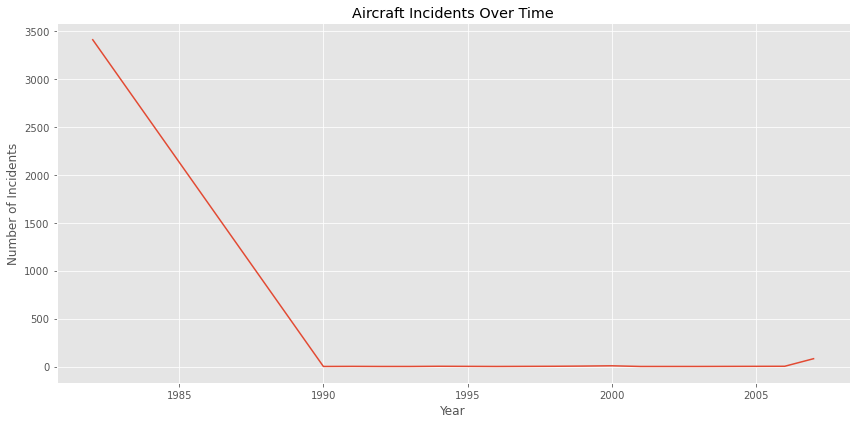

In [78]:
df['year'] = pd.to_datetime(df['event_date']).dt.year
incidents_over_time = df.groupby('year')['make_model'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=incidents_over_time, x='year', y='make_model')
plt.title('Aircraft Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***